In [3]:
!pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp311-cp311-linux_x86_64.whl size=401297 sha256=f473328fca2fa8d4dba906578ee254412d8fed97a58e65cfc4c89158f25df811
  Stored in directory: /root/.cache/pip/wheels/a0/d7/97/71bca023a0dbdceab24a556649d661e71114f4eaaf4dda56d6
Successfully built pymrmr


Selected Features: ['6', '7', '17', 'class', '1', '5', '4', '18', '16', '10']

Classification Report:

              precision    recall  f1-score   support

     Bearing       0.98      1.00      0.99        45
    Flywheel       1.00      0.96      0.98        45
     Healthy       0.98      1.00      0.99        45
         LIV       0.98      1.00      0.99        45
         LOV       0.98      0.98      0.98        45
         NRV       1.00      0.93      0.97        45
      Piston       0.94      1.00      0.97        45
   Riderbelt       1.00      0.98      0.99        45

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy: 0.9805555555555555


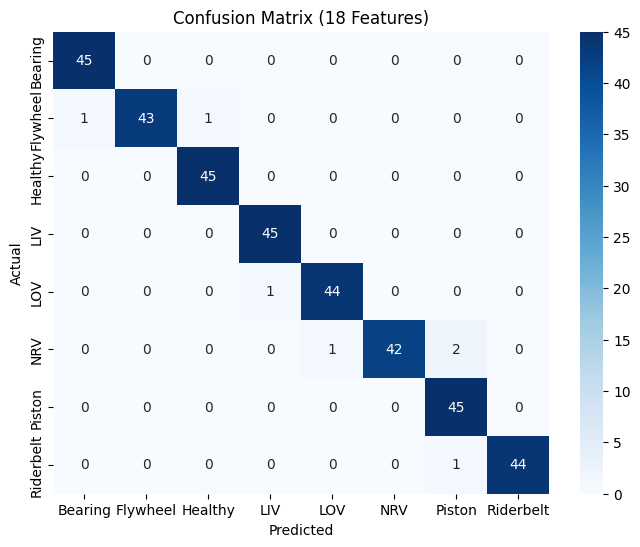

Model saved as svm_model_18features.pkl


In [ ]:
#Model for 18 features
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr
import joblib

# Load 18-feature dataset
df = pd.read_csv("/content/features_18.csv")

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled['class'] = y_encoded  # for pymrmr

selected_features = pymrmr.mRMR(X_scaled, 'MIQ', 10)
print("Selected Features:", selected_features)

# Prepare final feature set
X_selected = X_scaled[selected_features]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (18 Features)")
plt.show()

# Save model
joblib.dump(model, "svm_model_18features.pkl")
print("Model saved as svm_model_18features.pkl")


Selected Features: ['TD_3', 'TD_7', 'DWT_6', 'DWT_7', 'WPT_63', 'TD_6', 'WPT_1', 'MWT_5', 'WPT_31', 'MWT_7', 'FFT_1', 'WPT_15', 'WPT_3', 'FFT_4', 'WPT_7', 'FFT_2', 'MWT_4', 'FFT_5', 'WPT_127', 'MWT_1', 'FFT_3', 'WPT_132', 'FFT_8', 'FFT_7', 'WPT_129', 'FFT_6', 'WPT_33', 'TD_8', 'WPT_135', 'class']

Classification Report:

              precision    recall  f1-score   support

     Bearing       1.00      0.93      0.97        45
    Flywheel       0.87      1.00      0.93        45
     Healthy       1.00      0.91      0.95        45
         LIV       0.96      1.00      0.98        45
         LOV       1.00      0.93      0.97        45
         NRV       0.96      1.00      0.98        45
      Piston       1.00      0.98      0.99        45
   Riderbelt       1.00      1.00      1.00        45

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Accuracy: 0.96944444444444

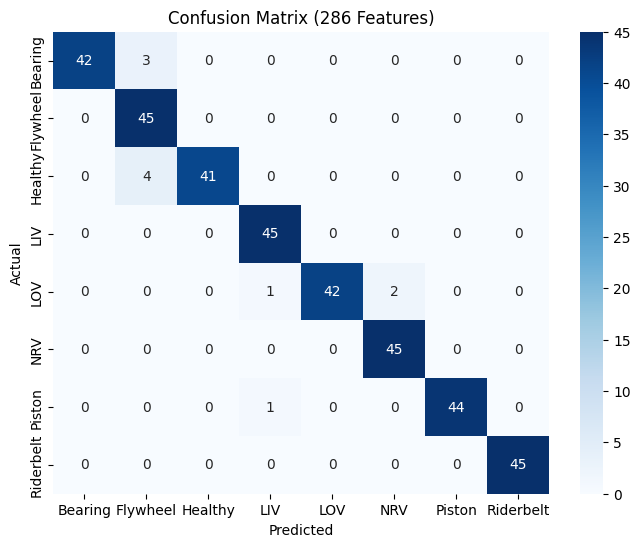

Model saved as svm_model_286features.pkl


In [4]:
#code for 286 features where Top 30 features are selected with mrmr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr
import joblib

# Load 18-feature dataset
df = pd.read_csv("/content/features_286.csv")

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled['class'] = y_encoded  # for pymrmr

selected_features = pymrmr.mRMR(X_scaled, 'MIQ', 30)
print("Selected Features:", selected_features)

# Prepare final feature set
X_selected = X_scaled[selected_features]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (286 Features)")
plt.show()

# Save model
joblib.dump(model, "svm_model_286features.pkl")
print("Model saved as svm_model_286features.pkl")


Selected Features: ['TD_3', 'TD_7', 'DWT_6', 'DWT_7', 'WPT_63', 'TD_6', 'WPT_1', 'MWT_5', 'WPT_31', 'MWT_7', 'FFT_1', 'WPT_15', 'WPT_3', 'FFT_4', 'WPT_7', 'FFT_2', 'MWT_4', 'FFT_5', 'WPT_127', 'MWT_1', 'FFT_3', 'WPT_132', 'FFT_8', 'FFT_7', 'WPT_129']

Classification Report:

              precision    recall  f1-score   support

     Bearing       0.18      0.42      0.25        45
    Flywheel       0.17      0.07      0.10        45
     Healthy       0.15      0.24      0.19        45
         LIV       0.09      0.07      0.07        45
         LOV       0.15      0.11      0.13        45
         NRV       0.00      0.00      0.00        45
      Piston       0.15      0.20      0.17        45
   Riderbelt       0.25      0.13      0.17        45

    accuracy                           0.16       360
   macro avg       0.14      0.16      0.14       360
weighted avg       0.14      0.16      0.14       360

Accuracy: 0.15555555555555556


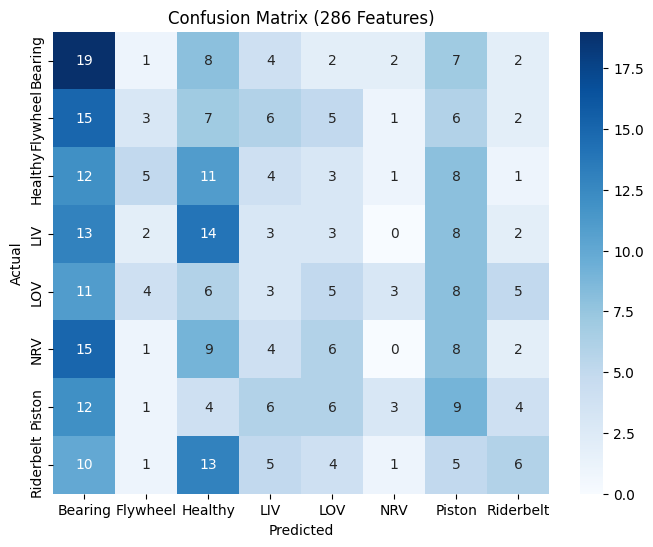

In [5]:
#code for 286 features where Top 25 features are selected with mrmr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pymrmr
import joblib

# Load 18-feature dataset
df = pd.read_csv("/content/features_286.csv")

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled['class'] = y_encoded  # for pymrmr

selected_features = pymrmr.mRMR(X_scaled, 'MIQ', 25)
print("Selected Features:", selected_features)

# Prepare final feature set
X_selected = X_scaled[selected_features]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (286 Features)")
plt.show()
